### Training from scratch on CIFAR-10 with Swin-tiny

 - We run both baseline ($\lambda_{drloc} = 0.0$) and our proposed method ($\lambda_{drloc}=0.5$) 100 epochs.
 - Owing to lacking computational resources, We run on a single GPU and the batch size is 128, which differs from the configurations in the original paper (8 GPUs and overall batch size 1024).
 - The training logs are provided in [`./logs`](./logs):
   - [swin_tiny_patch4_window7_224-baseline.txt](./logs/swin_tiny_patch4_window7_224-baseline.txt)  ($\lambda_{drloc} = 0.0$)
   - [swin_tiny_patch4_window7_224-drloc.txt](./logs/swin_tiny_patch4_window7_224-drloc.txt)  ($\lambda_{drloc} = 0.5$)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def collect_accs_from_log(log_path):
    acc_per_epoch = []
    with open(log_path, "r") as fin:
        for line in fin:
            if "INFO  * Acc@1" in line:
                acc = float(line.split(" ")[-3])
                acc_per_epoch.append(acc)
    return acc_per_epoch

In [3]:
accs_baseline = collect_accs_from_log("./logs/swin_tiny_patch4_window7_224-baseline.txt")
accs_drloc = collect_accs_from_log("./logs/swin_tiny_patch4_window7_224-drloc.txt")

print(len(accs_baseline), len(accs_drloc))

101 101


In [4]:
print(f"Max accuracy of Baseline: {max(accs_baseline):.2f}")
print(f"Max accuracy of Drloc: {max(accs_drloc):.2f}")

Max accuracy of Baseline: 86.17
Max accuracy of Drloc: 88.29


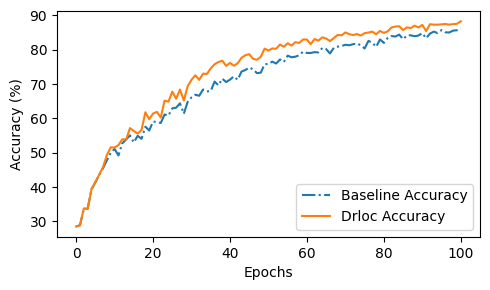

In [5]:
epochs = np.arange(len(accs_baseline))

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(epochs, accs_baseline, linestyle="-.", label="Baseline Accuracy")
ax.plot(epochs, accs_drloc, label="Drloc Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy (%)")
ax.legend(loc="lower right")
fig.tight_layout()
plt.show()